<a href="https://colab.research.google.com/github/MDRobiulhassan/Spam-Email-Detection/blob/main/SpamEmailDetection.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
# from google.colab import drive
# drive.mount('/content/drive')

In [2]:
import numpy as np
import pandas as pd
from sklearn.model_selection import train_test_split
import matplotlib.pyplot as plt
import nltk

In [3]:
df = pd.read_csv('/content/drive/MyDrive/Colab Notebooks/AIL Project Colab/Final Project 2/spam_dataset.csv')

In [4]:
df.head()

,label,text
0,ham,into the kingdom of god and those that are ent...
1,spam,there was flow at hpl meter 1505 on april firs...
2,ham,take a look at this one campaign for bvyhprice...
3,spam,somu wrote actually thats what i was looking f...
4,spam,fathi boudra wrote i fixed the issue in the sv...


In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 9989 entries, 0 to 9988
Data columns (total 2 columns):
 #   Column  Non-Null Count  Dtype 
---  ------  --------------  ----- 
 0   label   9989 non-null   object
 1   text    9989 non-null   object
dtypes: object(2)
memory usage: 156.2+ KB


In [6]:
df

,label,text
0,ham,into the kingdom of god and those that are ent...
1,spam,there was flow at hpl meter 1505 on april firs...
2,ham,take a look at this one campaign for bvyhprice...
3,spam,somu wrote actually thats what i was looking f...
4,spam,fathi boudra wrote i fixed the issue in the sv...
...,...,...
9984,ham,this would be a great tragedy for all concerne...
9985,ham,"hello , welcome to medzonline filamentous shop..."
9986,ham,this is amazing stuff add some inches fast saf...
9987,spam,author jra date escapenumber escapenumber esca...


# Data Preprocessing

In [7]:
from sklearn.preprocessing import LabelEncoder
encoder = LabelEncoder()

In [8]:
df['label'] = encoder.fit_transform(df['label'])

In [9]:
#null
df.isnull().sum()

,0
label,0
text,0


In [10]:
df=df.dropna()

In [11]:
#Duplicate
df.duplicated().sum()

np.int64(0)

In [12]:
df=df.drop_duplicates(keep='first')
df.duplicated().sum()

np.int64(0)

In [13]:
df.shape

(9989, 2)

In [14]:
df['label'].value_counts()

,count
label,
0,5294
1,4695


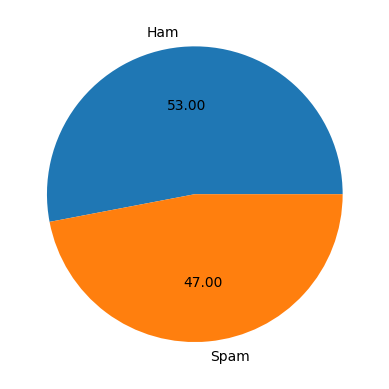

In [15]:
plt.pie(df['label'].value_counts(),labels=['Ham','Spam'],autopct='%0.2f')
plt.show()

In [16]:
df['length']=df['text'].apply(len)

In [17]:
df.head()

,label,text,length
0,0,into the kingdom of god and those that are ent...,1054
1,1,there was flow at hpl meter 1505 on april firs...,235
2,0,take a look at this one campaign for bvyhprice...,218
3,1,somu wrote actually thats what i was looking f...,847
4,1,fathi boudra wrote i fixed the issue in the sv...,549


In [18]:
import nltk
nltk.download('punkt_tab')

[nltk_data] Downloading package punkt_tab to /root/nltk_data...
[nltk_data]   Unzipping tokenizers/punkt_tab.zip.


True

In [19]:
df['word_count']=df['text'].apply(lambda x:len(nltk.word_tokenize(x)))

In [20]:
df.head()

,label,text,length,word_count
0,0,into the kingdom of god and those that are ent...,1054,183
1,1,there was flow at hpl meter 1505 on april firs...,235,56
2,0,take a look at this one campaign for bvyhprice...,218,30
3,1,somu wrote actually thats what i was looking f...,847,166
4,1,fathi boudra wrote i fixed the issue in the sv...,549,84


In [21]:
df['sentence_count']=df['text'].apply(lambda x:len(nltk.sent_tokenize(x)))

In [22]:
df.head(100)

,label,text,length,word_count,sentence_count
0,0,into the kingdom of god and those that are ent...,1054,183,1
1,1,there was flow at hpl meter 1505 on april firs...,235,56,9
2,0,take a look at this one campaign for bvyhprice...,218,30,1
3,1,somu wrote actually thats what i was looking f...,847,166,1
4,1,fathi boudra wrote i fixed the issue in the sv...,549,84,1
...,...,...,...,...,...
95,0,"sun , 19 dec 2004 22 : 45 : 30 - 0600\nbefore ...",2342,457,28
96,0,lady stalking grimly away on the arm of a rosy...,3160,556,1
97,1,andrew i'm very happy with the progress i've m...,380,77,1
98,1,"hi norma ,\nsevil ' s primary project has been...",448,83,5


In [23]:
df[['length','word_count','sentence_count']].describe()

,length,word_count,sentence_count
count,9989.000000,9989.000000,9989.000000
mean,1616.528381,276.317349,7.002202
std,3329.100269,582.813452,26.353763
min,4.000000,1.000000,1.000000
25%,437.000000,78.000000,1.000000
50%,855.000000,150.000000,1.000000
75%,1861.000000,310.000000,5.000000
max,141261.000000,24945.000000,988.000000


In [24]:
df[df['label']==0][['length','word_count','sentence_count']].describe()

,length,word_count,sentence_count
count,5294.000000,5294.000000,5294.000000
mean,1275.595202,214.803551,6.494900
std,2686.725086,471.249874,20.735354
min,4.000000,1.000000,1.000000
25%,347.000000,59.000000,1.000000
50%,675.000000,117.000000,1.000000
75%,1475.250000,244.000000,4.000000
max,141261.000000,24945.000000,502.000000


In [25]:
df[df['label']==1][['length','word_count','sentence_count']].describe()

,length,word_count,sentence_count
count,4695.000000,4695.000000,4695.000000
mean,2000.958679,345.679233,7.574228
std,3894.086881,680.636111,31.502037
min,4.000000,1.000000,1.000000
25%,573.000000,107.000000,1.000000
50%,1110.000000,196.000000,1.000000
75%,2157.000000,377.000000,6.000000
max,85490.000000,16876.000000,988.000000


In [26]:
import seaborn as sns

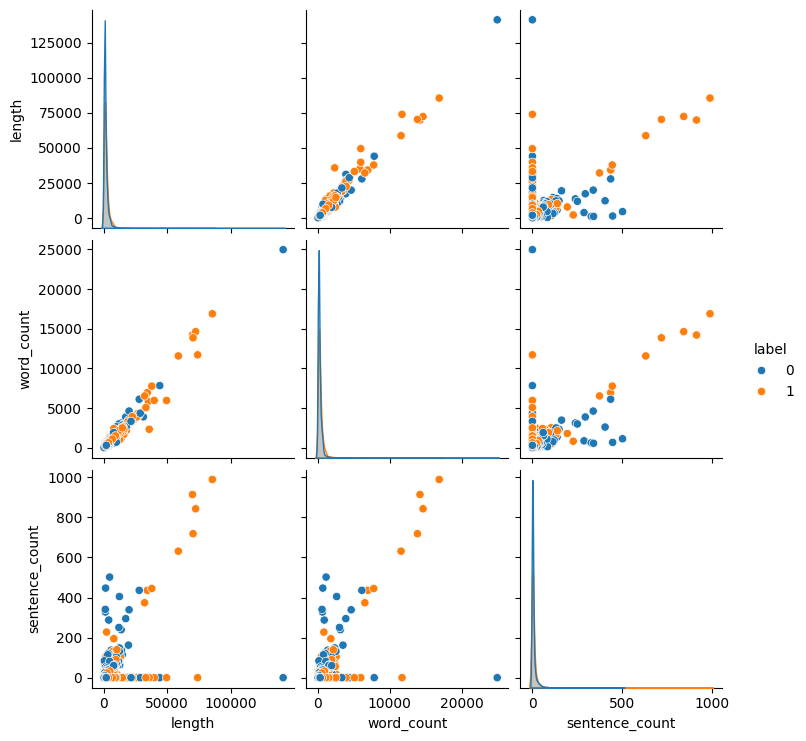

In [27]:
sns.pairplot(df,hue='label')

<Axes: >

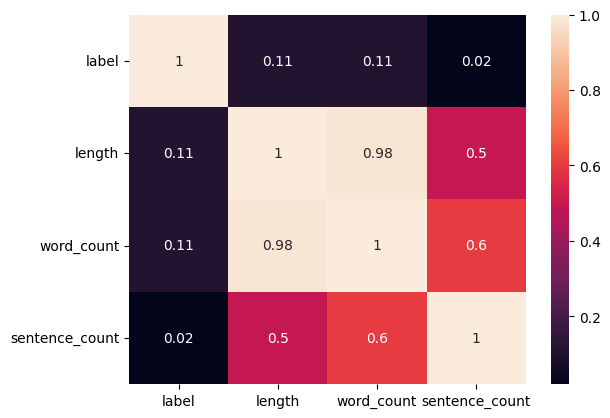

In [28]:
numeric_df = df.select_dtypes(include=[float, int])
sns.heatmap(numeric_df.corr(), annot=True)

In [29]:
import nltk
from nltk.corpus import stopwords
from nltk.stem import PorterStemmer
import string

In [30]:
nltk.download('stopwords')
ps = PorterStemmer()

[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Unzipping corpora/stopwords.zip.


In [31]:
def transform_text(text):
    text = text.lower()
    text = nltk.word_tokenize(text)

    y = []
    for i in text:
        if i.isalnum():
            y.append(i)

    text = y[:]
    y.clear()

    for i in text:
        if i not in stopwords.words('english') and i not in string.punctuation:
            y.append(i)

    text = y[:]
    y.clear()

    for i in text:
        y.append(ps.stem(i))


    return " ".join(y)

In [32]:
transform_text("I'm gonna be home soon and i don't want to talk about this stuff anymore tonight, k? I've cried enough today.")

'gon na home soon want talk stuff anymor tonight k cri enough today'

In [33]:
df['transformed_text'] = df['text'].apply(transform_text)

In [34]:
df.head()

,label,text,length,word_count,sentence_count,transformed_text
0,0,into the kingdom of god and those that are ent...,1054,183,1,kingdom god enter lord pardon escapenumb us th...
1,1,there was flow at hpl meter 1505 on april firs...,235,56,9,flow hpl meter 1505 april first deal ticket de...
2,0,take a look at this one campaign for bvyhprice...,218,30,1,take look one campaign bvyhpric escapenumb esc...
3,1,somu wrote actually thats what i was looking f...,847,166,1,somu wrote actual that look l r user enter str...
4,1,fathi boudra wrote i fixed the issue in the sv...,549,84,1,fathi boudra wrote fix issu svn repo rev escap...


In [35]:
from wordcloud import WordCloud
wc = WordCloud(width=500,height=500,min_font_size=10,background_color='white')

In [36]:
spam_wc = wc.generate(df[df['label'] == 1]['transformed_text'].str.cat(sep=" "))

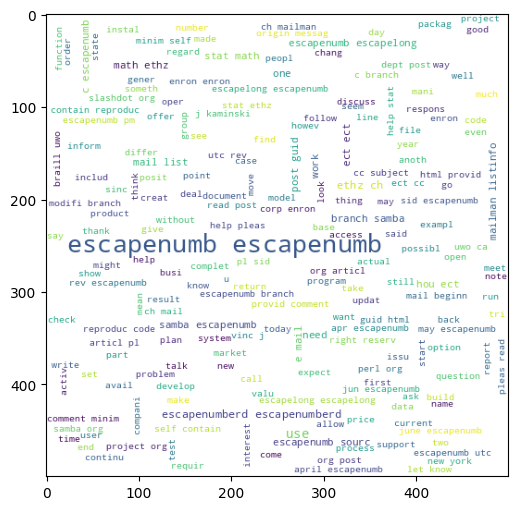

In [37]:
plt.figure(figsize=(15,6))
plt.imshow(spam_wc)

In [38]:
ham_wc = wc.generate(df[df['label'] == 0]['transformed_text'].str.cat(sep=" "))

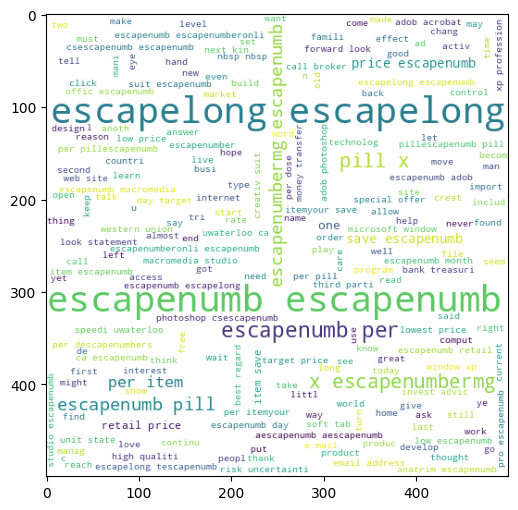

In [39]:
plt.figure(figsize=(15,6))
plt.imshow(ham_wc)

In [40]:
df.head()

,label,text,length,word_count,sentence_count,transformed_text
0,0,into the kingdom of god and those that are ent...,1054,183,1,kingdom god enter lord pardon escapenumb us th...
1,1,there was flow at hpl meter 1505 on april firs...,235,56,9,flow hpl meter 1505 april first deal ticket de...
2,0,take a look at this one campaign for bvyhprice...,218,30,1,take look one campaign bvyhpric escapenumb esc...
3,1,somu wrote actually thats what i was looking f...,847,166,1,somu wrote actual that look l r user enter str...
4,1,fathi boudra wrote i fixed the issue in the sv...,549,84,1,fathi boudra wrote fix issu svn repo rev escap...


In [41]:
spam_corpus = []
for msg in df[df['label'] == 1]['transformed_text'].tolist():
    for word in msg.split():
        spam_corpus.append(word)

In [42]:
len(spam_corpus)


1007195

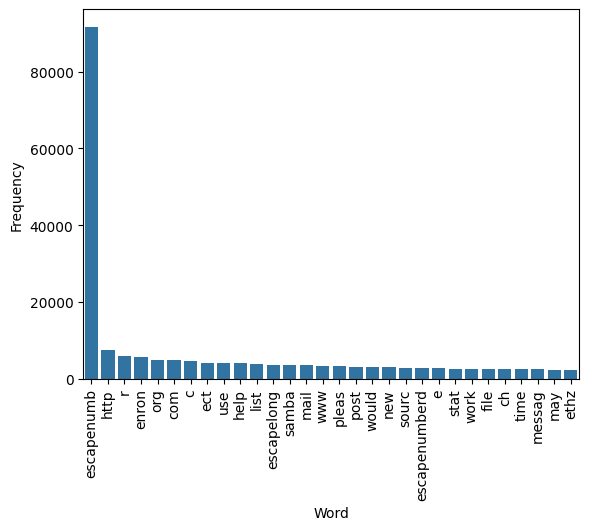

In [43]:
from collections import Counter
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

common_words_df = pd.DataFrame(Counter(spam_corpus).most_common(30), columns=['Word', 'Frequency'])

sns.barplot(x='Word', y='Frequency', data=common_words_df)
plt.xticks(rotation='vertical')
plt.show()


In [44]:
ham_corpus = []
for msg in df[df['label'] == 0]['transformed_text'].tolist():
    for word in msg.split():
        ham_corpus.append(word)

In [45]:
len(ham_corpus)

674994

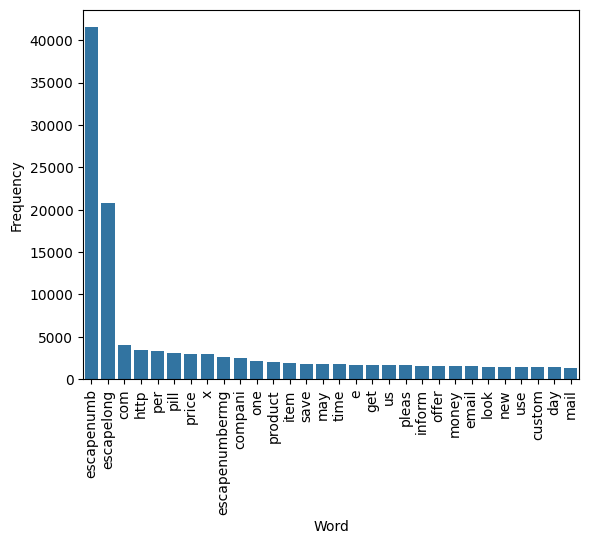

In [46]:
from collections import Counter
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

common_words_df = pd.DataFrame(Counter(ham_corpus).most_common(30), columns=['Word', 'Frequency'])

sns.barplot(x='Word', y='Frequency', data=common_words_df)
plt.xticks(rotation='vertical')
plt.show()


In [47]:
df.head()

,label,text,length,word_count,sentence_count,transformed_text
0,0,into the kingdom of god and those that are ent...,1054,183,1,kingdom god enter lord pardon escapenumb us th...
1,1,there was flow at hpl meter 1505 on april firs...,235,56,9,flow hpl meter 1505 april first deal ticket de...
2,0,take a look at this one campaign for bvyhprice...,218,30,1,take look one campaign bvyhpric escapenumb esc...
3,1,somu wrote actually thats what i was looking f...,847,166,1,somu wrote actual that look l r user enter str...
4,1,fathi boudra wrote i fixed the issue in the sv...,549,84,1,fathi boudra wrote fix issu svn repo rev escap...


In [48]:
df['processed_length'] = df['transformed_text'].apply(len)

In [49]:
df.head()

,label,text,length,word_count,sentence_count,transformed_text,processed_length
0,0,into the kingdom of god and those that are ent...,1054,183,1,kingdom god enter lord pardon escapenumb us th...,619
1,1,there was flow at hpl meter 1505 on april firs...,235,56,9,flow hpl meter 1505 april first deal ticket de...,106
2,0,take a look at this one campaign for bvyhprice...,218,30,1,take look one campaign bvyhpric escapenumb esc...,172
3,1,somu wrote actually thats what i was looking f...,847,166,1,somu wrote actual that look l r user enter str...,535
4,1,fathi boudra wrote i fixed the issue in the sv...,549,84,1,fathi boudra wrote fix issu svn repo rev escap...,440


In [50]:
first_row = df.iloc[0]
print("Original Text:\n", first_row['text'])
print("\nTransformed Text:\n", first_row['transformed_text'])


Original Text:
 into the kingdom of god and those that are entering in he lord pardon escapenumber us in this thing we pray thee have us excused escapenumbernot therefore o escapenumber believers to look into the grave for to you it the holy ghost and escapenumber therefore being a holy habitation unto forth the words of truth and escapenumber soberness escapenumber but in all probability hath made them mad escapenumber and though escapenumber blessed be god all do that of jesus christ they see the necessity of escapenumber closing with a more than almost christians but is heaven so small a escapenumber trifle in men's esteem as not to be total renovation of the whole man escapenumber by the righteousness of complete though we be delivered from the power escapenumber we are not candle of the lord shines out and your redeemer lifts up the escapenumber inward holiness as indeed sometimes they do though in a worms destroy escapenumber them yet even in their flesh shall they see a mind to 

In [51]:
import re

def remove_escape_words(text):
    return re.sub(r'\bescape\w*\b', '', text)

first_row['transformed_text'] = remove_escape_words(first_row['transformed_text'])

<ipython-input-51-f30d36c2c815>:6: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  first_row['transformed_text'] = remove_escape_words(first_row['transformed_text'])


In [52]:
first_row_copy = first_row.copy()

first_row_copy['transformed_text'] = remove_escape_words(first_row_copy['transformed_text'])

print("Original Text:\n", first_row['text'])
print("\nUpdated Transformed Text:\n", first_row_copy['transformed_text'])


Original Text:
 into the kingdom of god and those that are entering in he lord pardon escapenumber us in this thing we pray thee have us excused escapenumbernot therefore o escapenumber believers to look into the grave for to you it the holy ghost and escapenumber therefore being a holy habitation unto forth the words of truth and escapenumber soberness escapenumber but in all probability hath made them mad escapenumber and though escapenumber blessed be god all do that of jesus christ they see the necessity of escapenumber closing with a more than almost christians but is heaven so small a escapenumber trifle in men's esteem as not to be total renovation of the whole man escapenumber by the righteousness of complete though we be delivered from the power escapenumber we are not candle of the lord shines out and your redeemer lifts up the escapenumber inward holiness as indeed sometimes they do though in a worms destroy escapenumber them yet even in their flesh shall they see a mind to 

In [53]:
df['transformed_text'] = df['transformed_text'].apply(remove_escape_words)

In [54]:
df.head()

,label,text,length,word_count,sentence_count,transformed_text,processed_length
0,0,into the kingdom of god and those that are ent...,1054,183,1,kingdom god enter lord pardon us thing pray t...,619
1,1,there was flow at hpl meter 1505 on april firs...,235,56,9,flow hpl meter 1505 april first deal ticket de...,106
2,0,take a look at this one campaign for bvyhprice...,218,30,1,take look one campaign bvyhpric day target ...,172
3,1,somu wrote actually thats what i was looking f...,847,166,1,somu wrote actual that look l r user enter str...,535
4,1,fathi boudra wrote i fixed the issue in the sv...,549,84,1,fathi boudra wrote fix issu svn repo rev fix ...,440


In [55]:
import re
import nltk
from collections import Counter
from nltk.corpus import stopwords, wordnet

nltk.download('stopwords')
nltk.download('wordnet')

[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!
[nltk_data] Downloading package wordnet to /root/nltk_data...


True

In [56]:
import re

def clean_transformed_text(text):
    text = re.sub(r'https?://\S+|www\.\S+', '', text, flags=re.MULTILINE)
    text = re.sub(r'\b[a-zA-Z0-9.-]+\.(com|org|net|edu|gov|co|uk|in)\b', '', text, flags=re.MULTILINE)

    text = re.sub(r'\bhttp\b|\bhttps\b|\bwww\b', '', text, flags=re.MULTILINE)

    text = re.sub(r"[^a-zA-Z\s]", "", text).strip().lower()

    words = text.split()

    seen = set()
    words = [word for word in words if not (word in seen or seen.add(word))]

    words = [word for word in words if len(word) > 1 or word in ["i", "a"]]

    return " ".join(words)

In [57]:
df['transformed_text'] = df['transformed_text'].apply(lambda x: clean_transformed_text(str(x)))

In [58]:
spam_wc = wc.generate(df[df['label'] == 1]['transformed_text'].str.cat(sep=" "))

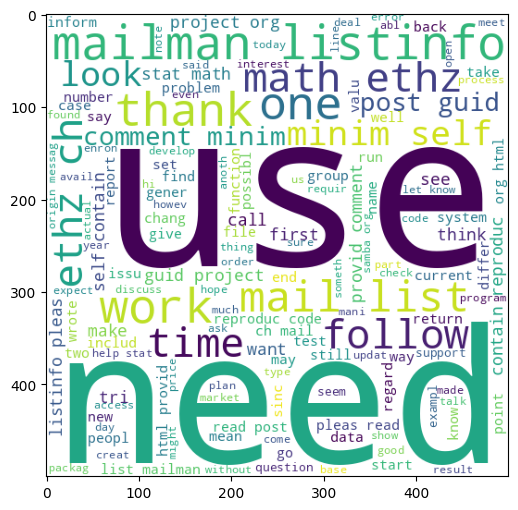

In [59]:
plt.figure(figsize=(15,6))
plt.imshow(spam_wc)

In [60]:
ham_wc = wc.generate(df[df['label'] == 0]['transformed_text'].str.cat(sep=" "))

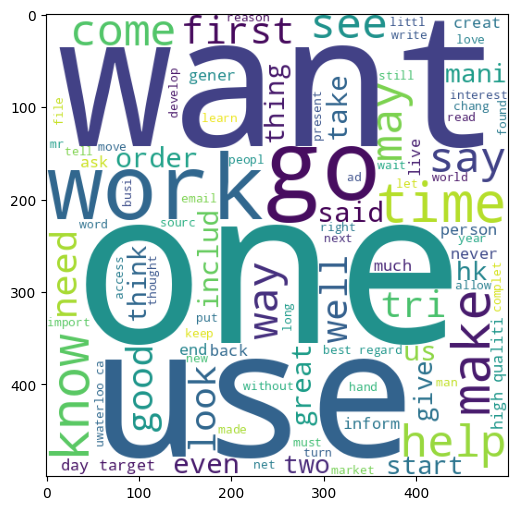

In [61]:
plt.figure(figsize=(15,6))
plt.imshow(ham_wc)

In [62]:
spam_corpus = []
for msg in df[df['label'] == 1]['transformed_text'].tolist():
    for word in msg.split():
        spam_corpus.append(word)

In [63]:
len(spam_corpus)

446870

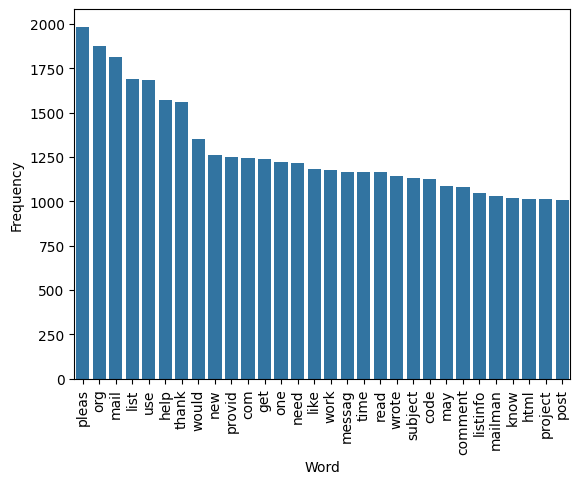

In [64]:
from collections import Counter
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

common_words_df = pd.DataFrame(Counter(spam_corpus).most_common(30), columns=['Word', 'Frequency'])

sns.barplot(x='Word', y='Frequency', data=common_words_df)
plt.xticks(rotation='vertical')
plt.show()

In [65]:
ham_corpus = []
for msg in df[df['label'] == 0]['transformed_text'].tolist():
    for word in msg.split():
        ham_corpus.append(word)

In [66]:
len(ham_corpus)

399352

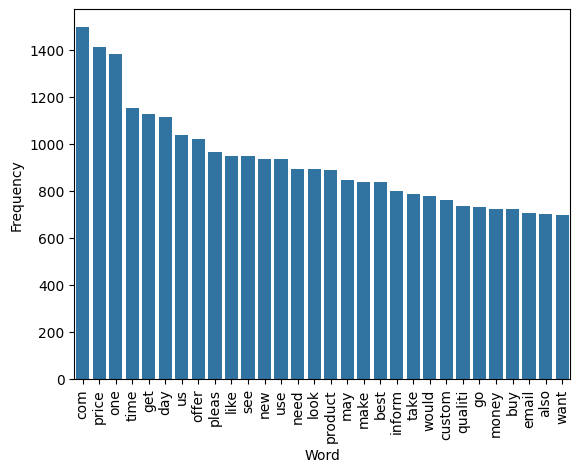

In [67]:
from collections import Counter
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

common_words_df = pd.DataFrame(Counter(ham_corpus).most_common(30), columns=['Word', 'Frequency'])

sns.barplot(x='Word', y='Frequency', data=common_words_df)
plt.xticks(rotation='vertical')
plt.show()

In [68]:
df['processed_length'] = df['transformed_text'].apply(len)

In [69]:
df.head()

,label,text,length,word_count,sentence_count,transformed_text,processed_length
0,0,into the kingdom of god and those that are ent...,1054,183,1,kingdom god enter lord pardon us thing pray th...,391
1,1,there was flow at hpl meter 1505 on april firs...,235,56,9,flow hpl meter april first deal ticket cover p...,82
2,0,take a look at this one campaign for bvyhprice...,218,30,1,take look one campaign bvyhpric day target pri...,109
3,1,somu wrote actually thats what i was looking f...,847,166,1,somu wrote actual that look user enter string ...,349
4,1,fathi boudra wrote i fixed the issue in the sv...,549,84,1,fathi boudra wrote fix issu svn repo rev dir c...,308


# Intial Model Development

In [70]:
from sklearn.feature_extraction.text import CountVectorizer,TfidfVectorizer
cv = CountVectorizer()
tfidf = TfidfVectorizer(max_features=3000)

In [71]:
X = tfidf.fit_transform(df['transformed_text']).toarray()

In [72]:
X.shape

(9989, 3000)

In [73]:
y = df['label'].values


In [74]:
from sklearn.model_selection import train_test_split

In [75]:
X_train,X_test,y_train,y_test = train_test_split(X,y,test_size=0.2,random_state=2)

In [76]:
from sklearn.naive_bayes import GaussianNB,MultinomialNB,BernoulliNB
from sklearn.metrics import accuracy_score, confusion_matrix, precision_score, recall_score, fbeta_score

In [77]:
gnb = GaussianNB()
mnb = MultinomialNB()
bnb = BernoulliNB()

In [78]:
gnb.fit(X_train,y_train)
y_pred1 = gnb.predict(X_test)
print(accuracy_score(y_test,y_pred1))
print(confusion_matrix(y_test,y_pred1))
print(precision_score(y_test,y_pred1))

0.9369369369369369
[[945  93]
 [ 33 927]]
0.9088235294117647


In [79]:
mnb.fit(X_train,y_train)
y_pred2 = mnb.predict(X_test)
print(accuracy_score(y_test,y_pred2))
print(confusion_matrix(y_test,y_pred2))
print(precision_score(y_test,y_pred2))

0.9454454454454454
[[982  56]
 [ 53 907]]
0.9418483904465212


In [80]:
bnb.fit(X_train,y_train)
y_pred3 = bnb.predict(X_test)
print(accuracy_score(y_test,y_pred3))
print(confusion_matrix(y_test,y_pred3))
print(precision_score(y_test,y_pred3))

0.8913913913913913
[[975  63]
 [154 806]]
0.9275028768699655


In [81]:
from sklearn.linear_model import LogisticRegression
from sklearn.svm import SVC
from sklearn.naive_bayes import MultinomialNB
from sklearn.tree import DecisionTreeClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.ensemble import AdaBoostClassifier
#from sklearn.ensemble import BaggingClassifier
from sklearn.ensemble import ExtraTreesClassifier
from sklearn.ensemble import GradientBoostingClassifier
from xgboost import XGBClassifier

In [82]:
svc = SVC(kernel='sigmoid', gamma=1.0)
knc = KNeighborsClassifier()
mnb = MultinomialNB()
dtc = DecisionTreeClassifier(max_depth=5)
lrc = LogisticRegression(solver='liblinear', penalty='l1')
rfc = RandomForestClassifier(n_estimators=50, random_state=2)
abc = AdaBoostClassifier(n_estimators=50, random_state=2)
#bc = BaggingClassifier(n_estimators=50, random_state=2)
etc = ExtraTreesClassifier(n_estimators=50, random_state=2)
gbdt = GradientBoostingClassifier(n_estimators=50,random_state=2)
xgb = XGBClassifier(n_estimators=50,random_state=2)

In [83]:
clfs = {
    'SVC' : svc,
    'KN' : knc,
    'NB': mnb,
    'DT': dtc,
    'LR': lrc,
    'RF': rfc,
    'AdaBoost': abc,
    #'BgC': bc,
    'ETC': etc,
    'GBDT':gbdt,
    'xgb':xgb
}


In [84]:
def train_classifier(clf, X_train, y_train, X_test, y_test):
    clf.fit(X_train, y_train)
    y_pred = clf.predict(X_test)
    accuracy = accuracy_score(y_test, y_pred)
    precision = precision_score(y_test, y_pred)
    recall = recall_score(y_test, y_pred)
    f2 = fbeta_score(y_test, y_pred, beta=2)

    return accuracy, precision, recall, f2

In [85]:
train_classifier(svc,X_train,y_train,X_test,y_test)

(0.9714714714714715, 0.9808306709265175, 0.959375, 0.9635907093534212)

In [86]:
accuracy_scores = []
precision_scores = []
recall_scores = []
f2_scores = []

for name, clf in clfs.items():
    current_accuracy, current_precision, current_recall, current_f2 = train_classifier(
        clf, X_train, y_train, X_test, y_test
    )

    print(f"For {name}:")
    print(f"Accuracy  - {current_accuracy}")
    print(f"Precision - {current_precision}")
    print(f"Recall    - {current_recall}")
    print(f"F2 Score  - {current_f2}")
    print()

    accuracy_scores.append(current_accuracy)
    precision_scores.append(current_precision)
    recall_scores.append(current_recall)
    f2_scores.append(current_f2)

For SVC:
Accuracy  - 0.9714714714714715
Precision - 0.9808306709265175
Recall    - 0.959375
F2 Score  - 0.9635907093534212

For KN:
Accuracy  - 0.6236236236236237
Precision - 1.0
Recall    - 0.21666666666666667
F2 Score  - 0.25691699604743085

For NB:
Accuracy  - 0.9454454454454454
Precision - 0.9418483904465212
Recall    - 0.9447916666666667
F2 Score  - 0.9442015407037269

For DT:
Accuracy  - 0.8538538538538538
Precision - 0.9538043478260869
Recall    - 0.73125
F2 Score  - 0.7670454545454546

For LR:
Accuracy  - 0.9569569569569569
Precision - 0.9823399558498896
Recall    - 0.9270833333333334
F2 Score  - 0.9376316898440792

For RF:
Accuracy  - 0.9719719719719719
Precision - 0.9839400428265525
Recall    - 0.9572916666666667
F2 Score  - 0.9625052366987851

For AdaBoost:
Accuracy  - 0.8913913913913913
Precision - 0.936545240893067
Recall    - 0.8302083333333333
F2 Score  - 0.8494990407162651

For ETC:
Accuracy  - 0.9684684684684685
Precision - 0.9696335078534032
Recall    - 0.964583333333

In [87]:
performance_df = pd.DataFrame({
    'Algorithm': clfs.keys(),
    'Accuracy': accuracy_scores,
    'Precision': precision_scores,
    'Recall': recall_scores,
    'F2 Score': f2_scores
}).sort_values('Recall', ascending=False)

In [88]:
performance_df

,Algorithm,Accuracy,Precision,Recall,F2 Score
7,ETC,0.968468,0.969634,0.964583,0.965589
0,SVC,0.971471,0.980831,0.959375,0.963591
5,RF,0.971972,0.983940,0.957292,0.962505
2,NB,0.945445,0.941848,0.944792,0.944202
4,LR,0.956957,0.982340,0.927083,0.937632
9,xgb,0.951952,0.975771,0.922917,0.933024
8,GBDT,0.909409,0.970979,0.836458,0.860296
6,AdaBoost,0.891391,0.936545,0.830208,0.849499
3,DT,0.853854,0.953804,0.731250,0.767045
1,KN,0.623624,1.000000,0.216667,0.256917


In [89]:
performance_df1 = pd.melt(performance_df, id_vars = "Algorithm")

In [90]:
performance_df1

,Algorithm,variable,value
0,ETC,Accuracy,0.968468
1,SVC,Accuracy,0.971471
2,RF,Accuracy,0.971972
3,NB,Accuracy,0.945445
4,LR,Accuracy,0.956957
5,xgb,Accuracy,0.951952
6,GBDT,Accuracy,0.909409
7,AdaBoost,Accuracy,0.891391
8,DT,Accuracy,0.853854
9,KN,Accuracy,0.623624


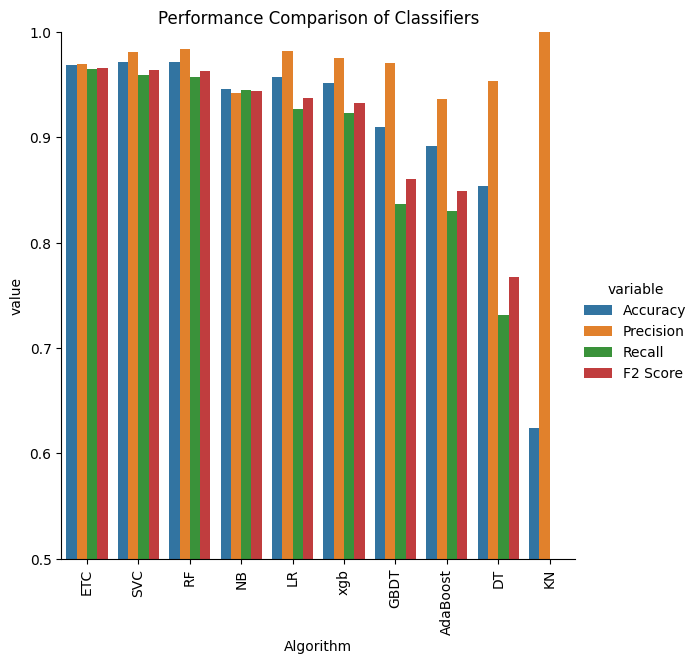

In [91]:
sns.catplot(x='Algorithm', y='value', hue='variable', data=performance_df1, kind='bar', height=6)
plt.ylim(0.5, 1.0)
plt.xticks(rotation='vertical')
plt.title("Performance Comparison of Classifiers")
plt.show()

In [92]:
for name, clf in clfs.items():
    clf.fit(X_train, y_train)
    y_pred = clf.predict(X_test)
    cm = confusion_matrix(y_test, y_pred)
    print(f"Confusion Matrix for {name}:\n", cm)
    print("\n")

Confusion Matrix for SVC:
 [[1020   18]
 [  39  921]]


Confusion Matrix for KN:
 [[1038    0]
 [ 752  208]]


Confusion Matrix for NB:
 [[982  56]
 [ 53 907]]


Confusion Matrix for DT:
 [[1004   34]
 [ 258  702]]


Confusion Matrix for LR:
 [[1022   16]
 [  70  890]]


Confusion Matrix for RF:
 [[1023   15]
 [  41  919]]


Confusion Matrix for AdaBoost:
 [[984  54]
 [163 797]]


Confusion Matrix for ETC:
 [[1009   29]
 [  34  926]]


Confusion Matrix for GBDT:
 [[1014   24]
 [ 157  803]]


Confusion Matrix for xgb:
 [[1016   22]
 [  74  886]]




#Model Optimization

In [93]:
temp_df = pd.DataFrame({'Algorithm':clfs.keys(),'Accuracy_max_ft_3000':accuracy_scores,'Precision_max_ft_3000':precision_scores}).sort_values('Precision_max_ft_3000',ascending=False)

In [94]:
temp_df = pd.DataFrame({'Algorithm':clfs.keys(),'Accuracy_scaling':accuracy_scores,'Precision_scaling':precision_scores}).sort_values('Precision_scaling',ascending=False)

In [95]:
new_df = performance_df.merge(temp_df,on='Algorithm')

In [96]:
new_df_scaled = new_df.merge(temp_df,on='Algorithm')

In [97]:
temp_df = pd.DataFrame({'Algorithm':clfs.keys(),'Accuracy_num_chars':accuracy_scores,'Precision_num_chars':precision_scores}).sort_values('Precision_num_chars',ascending=False)

In [98]:
new_df_scaled.merge(temp_df,on='Algorithm')

,Algorithm,Accuracy,Precision,Recall,F2 Score,Accuracy_scaling_x,Precision_scaling_x,Accuracy_scaling_y,Precision_scaling_y,Accuracy_num_chars,Precision_num_chars
0,ETC,0.968468,0.969634,0.964583,0.965589,0.968468,0.969634,0.968468,0.969634,0.968468,0.969634
1,SVC,0.971471,0.980831,0.959375,0.963591,0.971471,0.980831,0.971471,0.980831,0.971471,0.980831
2,RF,0.971972,0.983940,0.957292,0.962505,0.971972,0.983940,0.971972,0.983940,0.971972,0.983940
3,NB,0.945445,0.941848,0.944792,0.944202,0.945445,0.941848,0.945445,0.941848,0.945445,0.941848
4,LR,0.956957,0.982340,0.927083,0.937632,0.956957,0.982340,0.956957,0.982340,0.956957,0.982340
5,xgb,0.951952,0.975771,0.922917,0.933024,0.951952,0.975771,0.951952,0.975771,0.951952,0.975771
6,GBDT,0.909409,0.970979,0.836458,0.860296,0.909409,0.970979,0.909409,0.970979,0.909409,0.970979
7,AdaBoost,0.891391,0.936545,0.830208,0.849499,0.891391,0.936545,0.891391,0.936545,0.891391,0.936545
8,DT,0.853854,0.953804,0.731250,0.767045,0.853854,0.953804,0.853854,0.953804,0.853854,0.953804
9,KN,0.623624,1.000000,0.216667,0.256917,0.623624,1.000000,0.623624,1.000000,0.623624,1.000000


In [99]:
svc = SVC(kernel='sigmoid', gamma=1.0, probability=True)
rf = RandomForestClassifier(n_estimators=50, random_state=2)
etc = ExtraTreesClassifier(n_estimators=50, random_state=2)
from sklearn.ensemble import VotingClassifier

In [100]:
voting = VotingClassifier(estimators=[('svm', svc), ('rf', rf), ('et', etc)], voting='soft')

In [101]:
voting.fit(X_train,y_train)

VotingClassifier(estimators=[('svm',
                              SVC(gamma=1.0, kernel='sigmoid',
                                  probability=True)),
                             ('rf',
                              RandomForestClassifier(n_estimators=50,
                                                     random_state=2)),
                             ('et',
                              ExtraTreesClassifier(n_estimators=50,
                                                   random_state=2))],
                 voting='soft')

In [102]:
from sklearn.metrics import accuracy_score, precision_score, recall_score, fbeta_score, confusion_matrix

y_pred = voting.predict(X_test)

print("Accuracy:", accuracy_score(y_test, y_pred))
print("Precision:", precision_score(y_test, y_pred))
print("Recall:", recall_score(y_test, y_pred))
print("F2 Score:", fbeta_score(y_test, y_pred, beta=2))
print("Confusion Matrix:\n", confusion_matrix(y_test, y_pred))

Accuracy: 0.975975975975976
Precision: 0.9820295983086681
Recall: 0.9677083333333333
F2 Score: 0.9705390722941913
Confusion Matrix:
 [[1021   17]
 [  31  929]]


In [103]:
# from sklearn.model_selection import cross_val_score
# cross_val_scores = cross_val_score(clf, X_train, y_train, cv=5)
# print("Cross-validation scores:", cross_val_scores)
# print("Mean cross-validation score:", cross_val_scores.mean())

In [104]:
from sklearn.metrics import classification_report
print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

           0       0.97      0.98      0.98      1038
           1       0.98      0.97      0.97       960

    accuracy                           0.98      1998
   macro avg       0.98      0.98      0.98      1998
weighted avg       0.98      0.98      0.98      1998



In [105]:
# from sklearn.model_selection import learning_curve
# import matplotlib.pyplot as plt

# train_sizes, train_scores, test_scores = learning_curve(clf, X_train, y_train, cv=5)

# # Plot the learning curve
# plt.plot(train_sizes, test_scores.mean(axis=1), label="Test score")
# plt.plot(train_sizes, train_scores.mean(axis=1), label="Train score")
# plt.xlabel("Number of training samples")
# plt.ylabel("Score")
# plt.legend()
# plt.title("Learning Curve")
# plt.show()

In [106]:
# Applying stacking
estimators=[('svm', svc), ('rf', rf), ('et', etc)]
final_estimator=RandomForestClassifier()

In [107]:
from sklearn.ensemble import StackingClassifier

In [108]:
clf = StackingClassifier(estimators=estimators, final_estimator=final_estimator)

In [109]:
from sklearn.metrics import accuracy_score, precision_score, recall_score, fbeta_score, confusion_matrix

clf.fit(X_train, y_train)

y_pred = clf.predict(X_test)

print("Accuracy:", accuracy_score(y_test, y_pred))
print("Precision:", precision_score(y_test, y_pred))
print("Recall:", recall_score(y_test, y_pred))
print("F2 Score:", fbeta_score(y_test, y_pred, beta=2))
print("Confusion Matrix:\n", confusion_matrix(y_test, y_pred))


Accuracy: 0.9744744744744744
Precision: 0.9871382636655949
Recall: 0.959375
F2 Score: 0.9648020113136392
Confusion Matrix:
 [[1026   12]
 [  39  921]]


In [110]:
import pickle
pickle.dump(tfidf,open('vectorizer.pkl','wb'))
pickle.dump(voting,open('model.pkl','wb'))

In [111]:
# from sklearn.model_selection import cross_val_score
# cross_val_scores = cross_val_score(clf, X_train, y_train, cv=5)
# print("Cross-validation scores:", cross_val_scores)
# print("Mean cross-validation score:", cross_val_scores.mean())

In [112]:
from sklearn.metrics import classification_report
print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

           0       0.96      0.99      0.98      1038
           1       0.99      0.96      0.97       960

    accuracy                           0.97      1998
   macro avg       0.98      0.97      0.97      1998
weighted avg       0.97      0.97      0.97      1998



In [113]:
# from sklearn.model_selection import learning_curve
# import matplotlib.pyplot as plt

# train_sizes, train_scores, test_scores = learning_curve(clf, X_train, y_train, cv=5)

# # Plot the learning curve
# plt.plot(train_sizes, test_scores.mean(axis=1), label="Test score")
# plt.plot(train_sizes, train_scores.mean(axis=1), label="Train score")
# plt.xlabel("Number of training samples")
# plt.ylabel("Score")
# plt.legend()
# plt.title("Learning Curve")
# plt.show()

In [114]:
tfidf = pickle.load(open('vectorizer.pkl','rb'))
model = pickle.load(open('model.pkl','rb'))

In [115]:
import re
import nltk
from collections import Counter
from nltk.corpus import stopwords, wordnet

nltk.download('stopwords')
nltk.download('wordnet')

[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!
[nltk_data] Downloading package wordnet to /root/nltk_data...
[nltk_data]   Package wordnet is already up-to-date!


True

In [116]:
def transform_text(text):
    text = text.lower()
    text = nltk.word_tokenize(text)

    y = []
    for i in text:
        if i.isalnum():
            y.append(i)

    text = y[:]
    y.clear()

    for i in text:
        if i not in stopwords.words('english') and i not in string.punctuation:
            y.append(i)

    text = y[:]
    y.clear()

    for i in text:
        y.append(ps.stem(i))


    return " ".join(y)

import re

def clean_transformed_text(text):
    text = re.sub(r'https?://\S+|www\.\S+', '', text, flags=re.MULTILINE)
    text = re.sub(r'\b[a-zA-Z0-9.-]+\.(com|org|net|edu|gov|co|uk|in)\b', '', text, flags=re.MULTILINE)

    text = re.sub(r'\bhttp\b|\bhttps\b|\bwww\b', '', text, flags=re.MULTILINE)

    text = re.sub(r"[^a-zA-Z\s]", "", text).strip().lower()

    words = text.split()

    seen = set()
    words = [word for word in words if not (word in seen or seen.add(word))]

    words = [word for word in words if len(word) > 1 or word in ["i", "a"]]

    return " ".join(words)

In [117]:
tfidf = pickle.load(open('vectorizer.pkl','rb'))
model = pickle.load(open('model.pkl','rb'))


In [118]:
"""
while True:
    input_mail = input("Enter the message (type 0 to quit): ")

    if input_mail.lower() == '0':
        print("Exiting the spam filter.")
        break

    transformed_mail = transform_text(input_mail)
    transformed_mail = clean_transformed_text(transformed_mail)

    vector_input = tfidf.transform([transformed_mail])
    vector_input_dense = vector_input.toarray()

    result = model.predict(vector_input_dense)[0]

    if result == 1:
        print("Spam")
    else:
        print("Not Spam")
"""

'\nwhile True:\n    input_mail = input("Enter the message (type 0 to quit): ")\n\n    if input_mail.lower() == \'0\':\n        print("Exiting the spam filter.")\n        break\n\n    transformed_mail = transform_text(input_mail)\n    transformed_mail = clean_transformed_text(transformed_mail)\n\n    vector_input = tfidf.transform([transformed_mail])\n    vector_input_dense = vector_input.toarray()\n\n    result = model.predict(vector_input_dense)[0]\n\n    if result == 1:\n        print("Spam")\n    else:\n        print("Not Spam")\n'

In [119]:
!pip install gradio

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 54.1/54.1 MB 9.8 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 322.9/322.9 kB 19.8 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 95.2/95.2 kB 6.1 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 11.5/11.5 MB 96.0 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 72.0/72.0 kB 4.7 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 62.5/62.5 kB 4.0 MB/s eta 0:00:00


In [120]:
import gradio as gr
import pickle
import nltk
from sklearn.feature_extraction.text import TfidfVectorizer

tfidf = pickle.load(open('vectorizer.pkl', 'rb'))
model = pickle.load(open('model.pkl', 'rb'))

def classify_email(text):
    transformed_text = transform_text(text)
    transformed_text = clean_transformed_text(transformed_text)
    vector_input = tfidf.transform([transformed_text])
    vector_input_dense = vector_input.toarray()
    result = model.predict(vector_input_dense)[0]
    return "Spam" if result == 1 else "Not Spam"

iface = gr.Interface(fn=classify_email, inputs="text", outputs="text", title="Spam Detection System")

iface.launch()


It looks like you are running Gradio on a hosted a Jupyter notebook. For the Gradio app to work, sharing must be enabled. Automatically setting `share=True` (you can turn this off by setting `share=False` in `launch()` explicitly).

Colab notebook detected. To show errors in colab notebook, set debug=True in launch()
* Running on public URL: https://30336fc435ed044a74.gradio.live

This share link expires in 1 week. For free permanent hosting and GPU upgrades, run `gradio deploy` from the terminal in the working directory to deploy to Hugging Face Spaces (https://huggingface.co/spaces)
